# Previsão de Eleição de Deputados

**Aluno:** Rodolfo Marinho

Esta atividade tem como objetivo aplicar conhecimentos adquiridos sobre classificadores para prever o resultado das eleições dos candidatos às vagas de deputados em 2014.

## Descrição dos dados

Os dados utilizados nesta atividade se encontram neste [link](https://www.kaggle.com/c/ufcg-cdp-20182-lab3/data), e possuem as seguintes colunas:

+ ano: Ano da eleição;
+ sequencial_candidato: O identificador do candidato. Corresponde à coluna Id do arquivo de submissão;
+ nome: Nome do candidato;
+ uf: Sigla do estado do candidato;
+ partido: Partido do candidato;
+ quantidade_doacoes: Número de doações que um candidato recebeu;
+ quantidade_doadores: Numero de doadores que um candidato teve;
+ total_receita: Total de receita de um candidato;
+ media_receita: Média da receita de um candidato;
+ recursos_de_outros_candidatos.comites: Total de receita proveniente de outros candidatos e comitês;
+ recursos_de_pessoas_fisicas: Total de receita proveniente de pessoas físicas;
+ recursos_de_pessoas_juridicas: Total de receita proveniente de pessoas juridicas;
+ recursos_proprios:Total de receita proveniente dos próprios candidatos;
+ recursos_de_partido_politico: Total de receita proveniente do partido do candidato;
+ quantidade_despesas: Número de despesas que um candidato teve;
+ quantidade_fornecedores: Número de fornecedores que um candidato teve;
+ total_despesa: Total de depesa de um candidato;
+ media_despesa: Média da despesa de um candidato;
+ cargo: Cargo ao qual o candidato está concorrendo;
+ sexo: Sexo do candidato;
+ grau: Grau de escolaridade do candidato;
+ estado_civil: Estado civil do candidato;
+ ocupacao: Ocupação do candidato;
+ situacao: Situação final do candidato. Corresponde à coluna **Predict** do arquivo de submissão;

## Pré-processamento dos dados

Antes de tentar propor um modelo que se adeque à predição dos resultados das eleições, é importante conhecê-los um pouco melhor, e fazer alterações necessárias a eles.

### Classes de dados desbalanceadas

Nesta etapa buscamos entender se as classes são desbalanceadas (_i.e.,_ se existem mais exemplares de uma classe em relação às demais), e quais ações devem ser tomadas considerando as características dos dados disponibilizados.



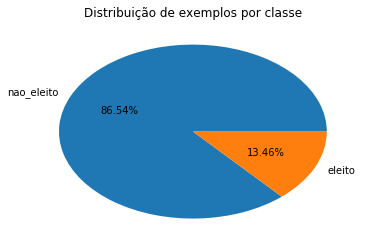

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

dados_treino = pd.read_csv("dados/train.csv")
dados_teste = pd.read_csv("dados/test.csv")

situacoes = dados_treino.situacao.unique()
cnts = dados_treino.situacao.value_counts()
situacoes_cnt = [cnts[s] for s in situacoes]
plt.pie(situacoes_cnt, labels=situacoes, autopct="%1.2f%%")
plt.title("Distribuição de exemplos por classe")
plt.show()

Como podemos ver, os dados disponíveis para treino estção desbalanceados, sendo os exemplos de deputados não eleitos cerca de 520% mais frequentes que os exemplos de deputados eleitos. Sem os devidos cuidados, com tais dados, um classificador poderia facilmente ficar enviesado, tendendo a classificar as entradas sempre como não eleitos.

Para evitar tal problema, várias alternativas podem ser consideradas. Dentre elas, podemos destacar:

1. o uso de uma métrica que considere tanto a precisão quanto o _recall_;
2. coleta de mais dados da classe minoritária;
3. geração de dados sintéticos da classe minoritária.

### Tratando atributos categóricos



### Normalização de dados

Nesta etapa, buscamos evitar que determinados atributos tenham um peso maior/menor do que o correto, devido à diferença entre grandezas dos atributos.

In [12]:
from sklearn import preprocessing

dados_treino_scaled = preprocessing.scale(dados_treino)

ValueError: could not convert string to float: 'nao_eleito'

## Treinando classificadores

A seguir, usaremos os dados de treino para treinar modelos com estratégias distintas. Para melhorar a escolha dos parâmetros, usaremos a estratégia de validação cruzada. Para tanto, o primeiro passo necessário é separar os dados entre conjunto de treino e conjunto de validação.

In [3]:
from sklearn.model_selection import train_test_split

X = dados_treino.drop(columns='situacao')
Y = dados_treino['situacao']

X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size = .3)

### Regressão logística

In [5]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import average_precision_score

lr_model = LogisticRegression()
lr_model.fit(X_train, Y_train)
lr_model_val = average_precision_score(Y_val, lr_model.decision_function(X_val))

print('- Modelo de regressão logística:')
print('\nResultados da validação: \nAccuracy = %f\nPrecision = %f\nRecall = %f' % (lr_model.score(X_val, Y_val), precision_score(Y_val, lr_model.predict(X_val)), recall_score(Y_val, lr_model.predict(X_val))))


/local/rodolfomarinho/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


ValueError: could not convert string to float: 'SERVIDOR PÚBLICO FEDERAL'